#**Problem 2 Male and Female Handwriting Digit**
 
Handwriting is a unique quality of human being, every person has unique handwriting that is very hard to copy but there can be some similarities
Between male and female handwriting. we will classify the difference between Male and Female Handwritting Digit using logistic regression.
 
Differences between Male and Female Handwriting Digit can be used in various applications like Archeology, forensic department. In this assignment, our main goal will be to achieve a good result using logistic regression and tuning hyperparameters correctly to get a better result.
 
 
 
 
 
#**Dataset**
 
 
> For this experiment, we will use the dataset [Ekush](https://shahariarrabby.github.io/ekush/#download) which is available in **Github**. 
There will be a total of **30830** images, and it was split in a **90:10** ratio. **90%** (**27747**) of data is used in training and **10%** (**3083**) was used in testing.Whole dataset was shuffled before spliting , so that traning and testing dataset can have both label data. 
 
**Snapshot from Dataset**

><div align="center">
<img src="https://drive.google.com/uc?id=1GhuJfYchOjfNoBtwkpWivPRQinegMYwy" width="600">
</div>
 
 
#**Experimental Setup**
 
 
> All of these experiments were performed using Google Colab free GPU, Models were created in PyTorch. 
 
 
During the whole experiment,
* The height and width of the input was **28*28 =784** 
* Output dimension was **(0,1)=2**
* Each batch size was different if each setting
* The number of iteration was **10000**
* **Softmax** activation function was used in output layer
* GPU **Tesla T4** was available 

 
- **totaldata:** 30830
 
 
 
 
> 
- **epochs**
  - $epochs = iterations \div \frac{totaldata}{minibatch}  $
 
We will use different  learning rate to achieve better performance
 
# **Result**
 
 
| Experiment Number      | Optimizer     | Learning Rate     |  Num of Hidden Layer   | Btach Size |Num of epoch    | |  Accurecy of last 1000 iterations    |
| :------------- | :----------: |:----------: | :-----------: | :-----------:  | :-----------: || :-----------: |
|  1 |SGD   | 0.02 | 4| 256 | 830   ||50.14  |
|  2 |SGD   | 0.01 | 4| 512 |  1660  ||49.17  |
|  3 |SGD   | 0.10 | 3| 256 | 830   ||50.66  |
|  4 |SGD   | 0.01 | 2| 1024 | 3321   ||49.82  |

 
 


**Importing All Important Library**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.utils import shuffle
drive.mount('/drive')
print(torch.cuda.get_device_name())


Mounted at /drive
Tesla P4


**Reading CSV**

In [ ]:
female_df=pd.read_csv("/drive/MyDrive/MaleFemaleDatsetCsv/femaleDigits.csv")
male_df=pd.read_csv("/drive/MyDrive/MaleFemaleDatsetCsv/maleDigits.csv")

**setting label 1 for female and 0 for male**

In [ ]:
female_df['label']=1
male_df['label']=0

**Merging, Normalize and Reshaping  CSV**

In [ ]:
df_name=[female_df,male_df]
dataset_image=pd.concat(df_name,ignore_index=True)
dataset_image= shuffle(dataset_image)
dataset_label=dataset_image['label']
print(dataset_image.shape)
dataset_image=dataset_image.drop(labels='label',axis=1)
print(dataset_image.shape)
dataset_image=dataset_image/255.0
dataset_image=dataset_image.values.reshape(-1,28,28,1)
print(dataset_image.shape)

(30830, 785)
(30830, 784)
(30830, 28, 28, 1)


**Displaying Image and Label**

1


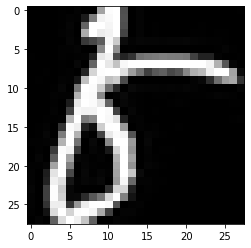

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

show_img = dataset_image[0].reshape(28, 28)
plt.imshow(show_img, cmap='gray')
print(dataset_label[0])

**Train and Test Data Split**

In [ ]:
train_image, test_image,train_label,test_label = train_test_split(dataset_image, dataset_label, test_size=0.1)
print(len(train_image))
print(len(train_label))
print(len(test_image))
print(len(test_label))

27747
27747
3083
3083


**Ziping Train, Test Data and Label**

In [ ]:
train_dataset = list(zip(test_image,train_label))
test_dataset = list(zip(test_image,test_label))

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 256
num_iters = 10000
input_dim = 28*28 # num_features = 784
#num_hidden = 100
output_dim = 2

learning_rate = 0.02

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 128
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.selu_1 = nn.SELU()

        ### 2nd hidden layer: 128 --> 128
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.selu_2 = nn.SELU()

        ### 3rd hidden layer: 128 --> 128
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.selu_3 = nn.SELU()


        ### 4th hidden layer: 128 --> 128
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.selu_4 = nn.SELU()

        ### Output layer: 128 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.selu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.selu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.selu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.selu_4(out)

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = 128)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 1000 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 1000. Loss: 0.660205602645874. Accuracy: 48.55660071359066
Iteration: 2000. Loss: 0.5657833814620972. Accuracy: 49.43237106714239
Iteration: 3000. Loss: 0.5582999587059021. Accuracy: 49.918910152448916
Iteration: 4000. Loss: 0.41484755277633667. Accuracy: 48.880960103795005
Iteration: 5000. Loss: 0.2626202702522278. Accuracy: 50.14596172559195
Iteration: 6000. Loss: 0.17708514630794525. Accuracy: 50.21083360363283
Iteration: 7000. Loss: 0.08090080320835114. Accuracy: 50.081089847551084
Iteration: 8000. Loss: 0.035998135805130005. Accuracy: 50.14596172559195
Iteration: 9000. Loss: 0.046478480100631714. Accuracy: 50.14596172559195
Iteration: 10000. Loss: 0.07257691025733948. Accuracy: 50.14596172559195


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 512
num_iters = 10000
input_dim = 28*28 # num_features = 784
#num_hidden = 100
output_dim = 2

learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 128
        self.linear_1 = nn.Linear(input_size, 128)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 128 --> 256
        self.linear_2 = nn.Linear(128, 256)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 256 --> 512
        self.linear_3 = nn.Linear(256, 512)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.SELU()


        ### 4th hidden layer: 512 --> 1024
        self.linear_4 = nn.Linear(512, 1024)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.SELU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(1024, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)

        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = 128)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 1000 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 1000. Loss: 0.6551018357276917. Accuracy: 48.134933506325005
Iteration: 2000. Loss: 0.6504107117652893. Accuracy: 51.70288679857282
Iteration: 3000. Loss: 0.6485781073570251. Accuracy: 51.475835225429776
Iteration: 4000. Loss: 0.6917115449905396. Accuracy: 50.66493674991891
Iteration: 5000. Loss: 0.712756335735321. Accuracy: 50.66493674991891
Iteration: 6000. Loss: 0.7359727621078491. Accuracy: 49.10801167693805
Iteration: 7000. Loss: 0.6371486186981201. Accuracy: 50.66493674991891
Iteration: 8000. Loss: 0.6867040991783142. Accuracy: 50.66493674991891
Iteration: 9000. Loss: 0.6871746778488159. Accuracy: 49.205319493999355
Iteration: 10000. Loss: 1.558924674987793. Accuracy: 49.205319493999355
Iteration: 11000. Loss: 0.7020922899246216. Accuracy: 49.17288355497892


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 256
num_iters = 10000
input_dim = 28*28 # num_features = 784
#num_hidden = 100
output_dim = 2

learning_rate = 0.10

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 128
        self.linear_1 = nn.Linear(input_size, 128)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 128 --> 256
        self.linear_2 = nn.Linear(128, 256)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 256 --> 512
        self.linear_3 = nn.Linear(256, 512)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.SELU()


        ### Output layer: 512 --> 10
        self.linear_out = nn.Linear(512, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        


        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = 128)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 1000 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 1000. Loss: 1.3946523666381836. Accuracy: 49.237755433019785
Iteration: 2000. Loss: 0.7654708027839661. Accuracy: 50.762244566980215
Iteration: 3000. Loss: 0.788465678691864. Accuracy: 50.762244566980215
Iteration: 4000. Loss: 0.694658637046814. Accuracy: 50.762244566980215
Iteration: 5000. Loss: 0.7534566521644592. Accuracy: 49.237755433019785
Iteration: 6000. Loss: 0.6943345665931702. Accuracy: 49.237755433019785
Iteration: 7000. Loss: 0.7011030912399292. Accuracy: 50.66493674991891
Iteration: 8000. Loss: 0.6886188387870789. Accuracy: 50.66493674991891
Iteration: 9000. Loss: 0.6943090558052063. Accuracy: 50.66493674991891
Iteration: 10000. Loss: 0.6881730556488037. Accuracy: 50.66493674991891


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 1024
num_iters = 10000
input_dim = 28*28 # num_features = 784
#num_hidden = 100
output_dim = 2

learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 128
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.selu_1 = nn.LeakyReLU()

        ### 2nd hidden layer: 128 --> 128
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.selu_2 = nn.SELU()


        ### Output layer: 128 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.selu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.selu_2(out)


        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = 128)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 1000 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 1000. Loss: 1.342021107673645. Accuracy: 52.87058060330847
Iteration: 2000. Loss: 0.03278031945228577. Accuracy: 50.56762893285761
Iteration: 3000. Loss: 0.0418388731777668. Accuracy: 50.53519299383717
Iteration: 4000. Loss: 0.002530053723603487. Accuracy: 50.14596172559195
Iteration: 5000. Loss: 0.07009795308113098. Accuracy: 49.88647421342848
Iteration: 6000. Loss: 0.00316959829069674. Accuracy: 49.82160233538761
Iteration: 7000. Loss: 0.0015828695613890886. Accuracy: 50.11352578657152
Iteration: 8000. Loss: 0.0001606074074516073. Accuracy: 50.11352578657152
Iteration: 9000. Loss: 0.0031978576444089413. Accuracy: 49.95134609146935
Iteration: 10000. Loss: 0.00012984535715077072. Accuracy: 50.24326954265326
Iteration: 11000. Loss: 0.0. Accuracy: 50.081089847551084
Iteration: 12000. Loss: 0.07003676146268845. Accuracy: 50.30814142069413
Iteration: 13000. Loss: 0.011753994040191174. Accuracy: 49.82160233538761
